# Chapter 4 - Vector applications

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

np.set_printoptions(suppress=True, precision=4)

## Correlations and cosine similarity

- A correlation coefficient is a single number that quantifies
 the linear relationship between two variables.

- Range from -1 to +1

## K-Means


1. Initialize k centroids as random points in the data space. Each centroid is a class,
or category, and the next steps will assign each data observation to each class. (A
centroid is a center generalized to any number of dimensions.)

2. Compute the Euclidean distance between each data observation and eachcentroid.1

3. Assign each data observation to the group with the closest centroid.

4. Update each centroid as the average of all data observations assigned to that centroid.
5. Repeat steps 2–4 until a convergence criteria is satisfied, or for N iterations.

In [5]:
from sklearn.datasets import make_blobs

## Step 0: Create data

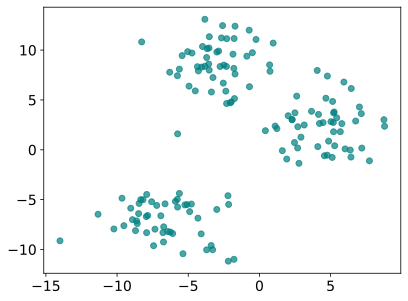

In [14]:
# Create Data
data = np.random.uniform(1, 10, (150, 2))

data, true_labels = make_blobs(n_samples=150, centers=3, cluster_std=2.2, random_state=42)


plt.scatter(data[:, 0], data[:, 1], alpha=0.7, color='teal')
plt.show()

## Step 1: Initialize k random centroids in the data

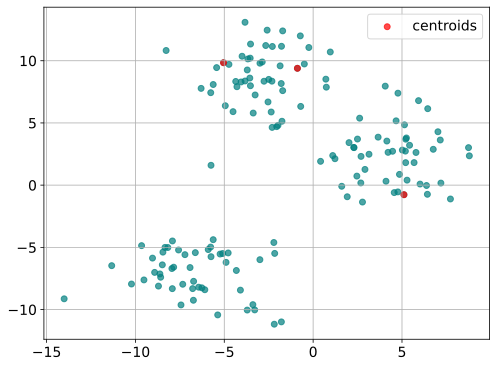

In [17]:
# Step 1: Initialize k random centroids 

# Let's fix it to k = 3
k = 3

# Select k random values between 0 and 150 (lenght of our data) This will produce for example array([10, 52, 86])
ridx = np.random.choice(range(len(data)),k,replace=False)

# Select rows from our random choice
centroids = data[ridx]

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, color='teal')
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.7, color=('red'), label='centroids')

plt.legend(loc='best')
plt.grid(True)

In [49]:
##################### Recall broadcasting in python #####################
# When vectors are not the same size Python performs a broadcasting operation 
# v is 3x1 
# w is 1x2 
# when we add them python broadcasts by adding each value in v to w 3 times and producing 
# The equivalent of 
#  [1 1] + [10 20]
#  [2 2] + [10 20]
#  [3 3] + [10 20]

v = np.array([[1,2,3]]).T # col vector
print('Column vector v: ')
print(v)
w = np.array([[10,20]])   # row vector
print('Row vector w: ')
print(w)
print('v - w')
print(v + w) # addition with broadcasting



##################### Recall broadcasting in python #####################

Column vector v: 
[[1]
 [2]
 [3]]
Row vector w: 
[[10 20]]
v - w
[[11 21]
 [12 22]
 [13 23]]


### Broadcasting the diff of 1 data point to all centroids 

In [70]:
# Let's apply the same here in k-means 
# Let's take our first data point 
d_0 = data[0] 
print('Data point 0:')
print(d_0)

# We want to substract the 3 centroids 
print('\nCentroids: ')
print(centroids)

# Calculate the difference between our data point and each centroid
diff_vectors = d_0 - centroids
print('\nBroadcast (d_0 - centroids):')
print(diff_vectors)


# The actual distance would be the magnitude of each of those vectors 
print('\nDistance vs centroid 1')
distance_1 = np.linalg.norm(diff_vectors[0])
print(f'Magnitude (distance): {distance_1: .5f}\nSquared: {distance_1**2: .5f}')

print('\nDistance vs centroid 2')
distance_2 = np.linalg.norm(diff_vectors[1])
print(f'Magnitude (distance): {distance_2: .5f}\nSquared: {distance_2**2: .5f}')

print('\nDistance vs centroid 2')
distance_3 = np.linalg.norm(diff_vectors[2])
print(f'Magnitude (distance): {distance_3: .5f}\nSquared: {distance_3**2: .5f}')

# Let's pack this data for future reference 
dist_0_calc = np.array([distance_1, distance_2, distance_3])
print('\nArray of distances to point 0: ')
print(dist_0_calc)

Data point 0:
[-2.588  12.4565]

Centroids: 
[[-5.0414  9.8408]
 [ 5.1109 -0.7675]
 [-0.8846  9.3913]]

Broadcast (d_0 - centroids):
[[ 2.4534  2.6157]
 [-7.6989 13.224 ]
 [-1.7034  3.0652]]

Distance vs centroid 1
Magnitude (distance):  3.58620
Squared:  12.86080

Distance vs centroid 2
Magnitude (distance):  15.30183
Squared:  234.14612

Distance vs centroid 2
Magnitude (distance):  3.50674
Squared:  12.29721

Array of distances to point 0: 
[ 3.5862 15.3018  3.5067]


In [84]:
# If we wanted to get this for all data points we would need to loop through them 
# Initialize a structure to store all distances for all vectors 
dists_calc_1 = np.zeros((150, 3))
for i in range(len(data)): 
    # Conpute difference vectors 
    diff_vectors = data[i] - centroids
    # Get the magnitude of each difference vector
    for j in range(len(diff_vectors)): 
        dists_calc_1[i, j] = np.linalg.norm(diff_vectors[j])

print('First 10 sets of differences:')
print(dists_calc_1[:10])

First 10 sets of differences:
[[ 3.5862 15.3018  3.5067]
 [ 1.6556 13.132   3.6284]
 [18.132  13.6132 18.4426]
 [15.7257  4.8266 11.961 ]
 [15.6065 11.946  15.9025]
 [14.7446  1.2453 11.5838]
 [ 1.165  14.3805  3.261 ]
 [ 1.5436 13.9761  2.7801]
 [14.6112 13.5486 15.5564]
 [13.6592  2.4079 11.3572]]


### Can we do better? YES! Broadcating the differences of centroids to all data points

In [94]:
# Last section may look good, but when our data becomes massive, looping through millions of data points becomes memory consuming 

# Instead we can just loop through the centroids and broadcast the differences 

# It is basically the mirror process as above 

# Take the first centroid 
print(f'Centroid 1:\n {centroids[0]}\n')

# Take the data 
print(f'Data points:\n {data[:10]}\n')

# Broadcast centroid 1 to data 
diff_vectors = centroids[0] - data
print(f'Diff vectors: \n {diff_vectors[:10]}')

Centroid 1:
 [-5.0414  9.8408]

Data points:
 [[-2.588  12.4565]
 [-4.3555  8.334 ]
 [-6.2614 -8.25  ]
 [ 8.7895  2.3572]
 [-5.7465 -5.7498]
 [ 6.0163  0.0874]
 [-3.9984 10.36  ]
 [-3.542  10.2079]
 [-7.9179 -4.4844]
 [ 2.7769 -1.3595]]

Diff vectors: 
 [[ -2.4534  -2.6157]
 [ -0.6859   1.5068]
 [  1.2201  18.0909]
 [-13.8309   7.4836]
 [  0.7052  15.5906]
 [-11.0577   9.7534]
 [ -1.043   -0.5192]
 [ -1.4993  -0.3671]
 [  2.8765  14.3252]
 [ -7.8183  11.2003]]


## Step 2: 
 Compute the Euclidean distance between each data observation and each centroid

In [58]:
dists = np.zeros((data.shape[0],k))
for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

dists

array([[ 12.8608, 234.1461,  12.2972],
       [  2.7409, 172.4488,  13.165 ],
       [328.7681, 185.3191, 340.1278],
       [247.297 ,  23.2958, 143.0654],
       [243.5641, 142.7074, 252.891 ],
       [217.4022,   1.5507, 134.1847],
       [  1.3573, 206.7992,  10.6344],
       [  2.3828, 195.332 ,   7.729 ],
       [213.4867, 183.5645, 242.0029],
       [186.5731,   5.7978, 128.9861],
       [216.8   ,  68.3633, 197.7586],
       [384.658 , 235.8664, 404.5401],
       [201.2214,   0.3284, 129.4661],
       [235.5205, 159.5238, 252.4846],
       [ 94.4571,  26.8405,  43.7622],
       [  3.4076, 193.651 ,  24.1492],
       [327.4533, 188.7136, 340.356 ],
       [  8.2717, 143.7466,   3.4006],
       [155.1886,  12.2761,  81.2137],
       [ 98.8596,  23.4341,  57.2782],
       [  2.1203, 178.2684,   7.9829],
       [338.0346, 226.9236, 363.1598],
       [124.0999,  19.515 ,  59.5206],
       [243.1811,  75.1685, 222.953 ],
       [ 99.9845,  22.4475,  50.4468],
       [237.4104, 234.744

In [50]:
dists

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0